In [1]:
from src.training.model import TransformerClassifier
from src.utils import load_config

import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load config
env = "prod"
model_type = "BERT"
model_version = "prod"
output_reports = f"../../output_reports/{model_version}/clustering"

training_config = load_config(
    file_name="training_config", env=env, folder="../../config"
)

In [3]:
input_new_class = f"../../output_reports/{model_version}/clustering/new_class.parquet"

In [4]:
df = pd.read_parquet(input_new_class)

In [5]:
df["ground_truth"] = df["label"].apply(lambda x: 1 if x == 2 else 0)
df["predicted"] = df["new_class"].apply(lambda x: 1 if x else 0)

In [6]:
y = df["ground_truth"]
y_pred = df["predicted"]

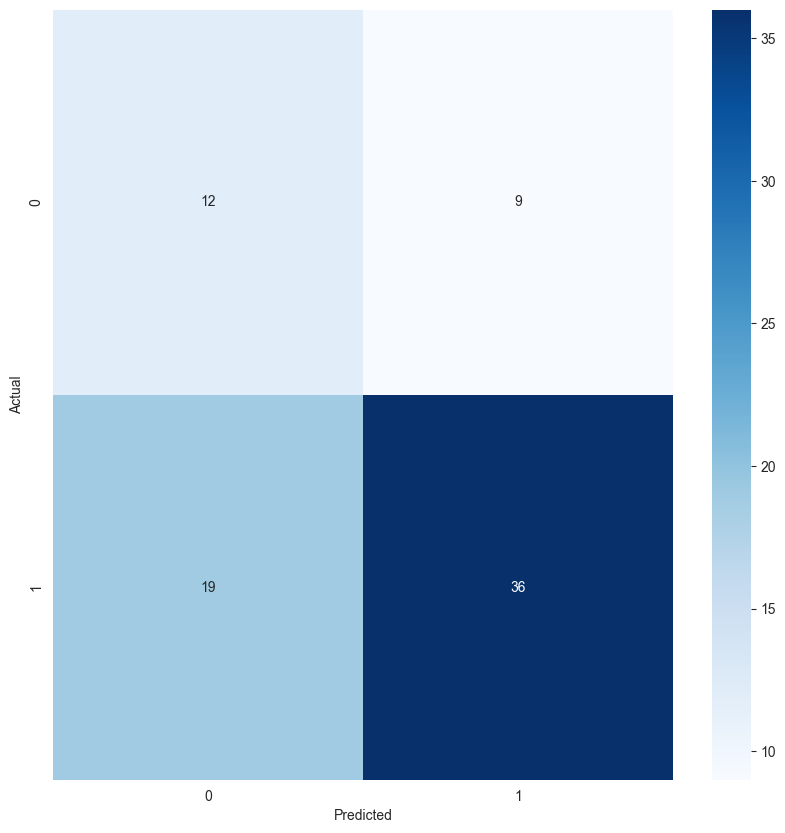

In [7]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_pred)
fig = plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
from src.evaluating.utils import plot_confusion_matrix, accuracy_score
import os

plot_confusion_matrix(
    cm,
    classes=np.unique(y),
    title="Confusion Matrix - New class detection",
    output_path=os.path.join(output_reports, "new_class_confusion_matrix.png"),
)

In [9]:
clf_report = classification_report(y, y_pred)
acc = accuracy_score(y, y_pred)
print(f"Accuracy: {acc:.4f}")
print(clf_report)

Accuracy: 0.6316
              precision    recall  f1-score   support

           0       0.39      0.57      0.46        21
           1       0.80      0.65      0.72        55

    accuracy                           0.63        76
   macro avg       0.59      0.61      0.59        76
weighted avg       0.69      0.63      0.65        76



In [10]:
report_path = os.path.join(output_reports, "new_class_classification_report.txt")
with open(report_path, "w", encoding="utf-8") as f:
    f.write("New Class Detection\n")
    f.write(f"Model version: {model_version}\n\n")
    f.write("Accuracy:\n")
    f.write(f"{acc}\n\n")
    f.write("Confusion Matrix:\n")
    f.write(f"{cm}\n\n")
    f.write("Classification Report:\n")
    f.write(f"{clf_report}\n")

In [11]:
df

,processed_text_to_analyse,label,embeddings,cluster,distance_to_centroids,new_class,special_case,ground_truth,predicted
0,funcionan blueface pantalla bloqueada pantalla...,1,"[0.51032954, -0.13367134, -0.9447641, 0.606145...",-1,11.010715,False,True,0,0
1,pantalla queda blanco pantalla queda blanco,1,"[1.1217836, 0.33601546, -0.53032863, -0.476140...",-1,11.458381,False,True,0,0
2,termostato funciona pantalla termostato bluefa...,1,"[0.95283014, 0.37829226, -0.5700364, 0.1369481...",0,7.077471,True,False,0,1
3,fallo display fallo termostato nivel tactil fa...,1,"[0.667092, 0.69482964, -0.43033233, 1.0327048,...",-1,12.614278,False,True,0,0
4,termostato funciona pantalla digital completam...,0,"[0.77069706, 0.059462972, -0.9304868, 0.593897...",0,11.563498,True,False,0,1
...,...,...,...,...,...,...,...,...,...
71,problema conectores rapidos placa,2,"[0.9285592, 0.15875724, -0.41858453, -0.164686...",0,8.277205,True,False,1,1
72,interfaz blue face funciona diagnosticado airz...,2,"[1.1301181, 0.14772631, -0.15343514, 0.3054178...",-1,12.774030,False,True,1,0
73,problemas comunicacion termostato comunicarse,2,"[0.43008572, 0.42588198, 0.3694204, 0.6083842,...",1,8.630570,True,False,1,1
74,numero archivo linea directa 240300921 sustitu...,2,"[0.54400814, 0.19692226, -0.31303784, 0.212936...",0,8.978546,True,False,1,1
